In [2]:
# Import CSV file
import pandas as pd
import numpy as np
df = pd.read_csv('Consumer_Complaints.csv')

In [3]:
#removes empty narrative rows
rows1 = df.shape
row1 = rows1[0]
df = df[pd.notnull(df['Consumer complaint narrative'])] # ONLY KEEPSROWS WITH NON-NAN VALUES IN COLUMN i
rows2 = df.shape
row2 = rows2[0]
difference = row1 - row2
print("original set had "+str(row1)+" observations")
print(str(difference)+" rows had blank narratives")
print(str(row2)+" observations will be analyzed")
df = df.reset_index(drop=True)
# string_counts = Counter(df['Company']) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
# string_counts = OrderedDict(string_counts.most_common())

original set had 903983 observations
704013 rows had blank narratives
199970 observations will be analyzed


In [11]:
from collections import Counter, OrderedDict # CALLS COUNTER FUNCTION
string_counts = Counter(df['Company']) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
#string_counts = OrderedDict(string_counts.most_common())
print(string_counts)

Counter({'EQUIFAX, INC.': 16225, 'TRANSUNION INTERMEDIATE HOLDINGS, INC.': 12768, 'Experian Information Solutions Inc.': 12687, 'WELLS FARGO & COMPANY': 8612, 'BANK OF AMERICA, NATIONAL ASSOCIATION': 8266, 'CITIBANK, N.A.': 8029, 'Navient Solutions, LLC.': 7719, 'JPMORGAN CHASE & CO.': 7401, 'CAPITAL ONE FINANCIAL CORPORATION': 4582, 'OCWEN LOAN SERVICING LLC': 3576, 'SYNCHRONY FINANCIAL': 3461, 'NATIONSTAR MORTGAGE': 3185, 'Ditech Financial LLC': 2645, 'U.S. BANCORP': 2568, 'AMERICAN EXPRESS COMPANY': 2364, 'ENCORE CAPITAL GROUP INC.': 2014, 'PORTFOLIO RECOVERY ASSOCIATES INC': 1917, 'AES/PHEAA': 1913, 'DISCOVER BANK': 1654, 'PAYPAL HOLDINGS INC.': 1476, 'ERC': 1435, 'PNC Bank N.A.': 1407, 'TD BANK US HOLDING COMPANY': 1316, 'BARCLAYS BANK DELAWARE': 1262, 'SELECT PORTFOLIO SERVICING, INC.': 1199, 'SANTANDER CONSUMER USA HOLDINGS INC.': 1135, 'TRANSWORLD SYSTEMS INC': 1010, 'SUNTRUST BANKS, INC.': 1008, 'UNITED SERVICES AUTOMOBILE ASSOCIATION': 991, 'ALLY FINANCIAL INC.': 960, 'Seteru

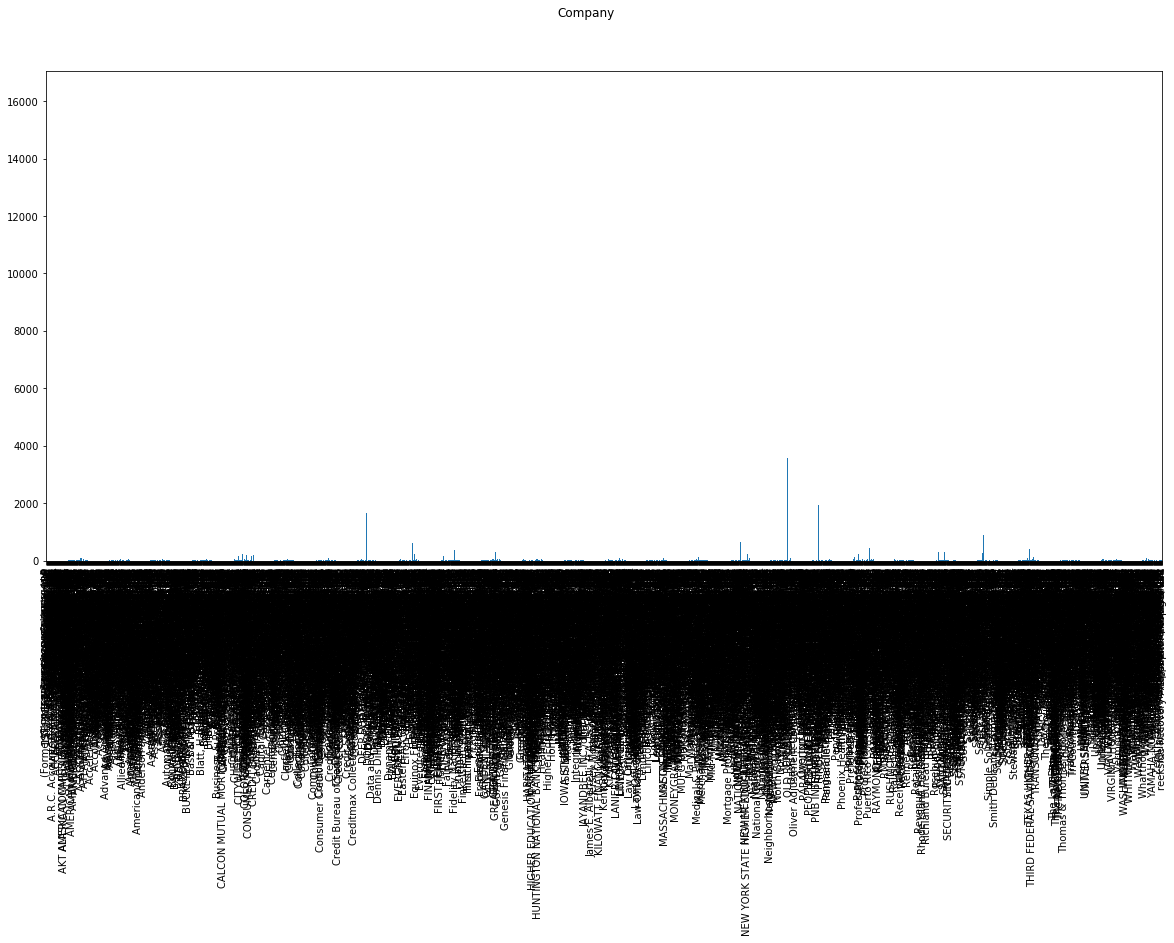

In [4]:
# # histogram for companies directly from the file
# from collections import Counter, OrderedDict # CALLS COUNTER FUNCTION
# from matplotlib import pyplot # IMPORTS GRAPH FUNCTION
# string_counts = Counter(df['Company']) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
# string_counts = OrderedDict(string_counts.most_common())
# pyplot.figure(1, figsize=(20, 9)) # CREATES A FIGURE WITH THE DIMENSIONS INDICATED
# pd.Series(Counter(string_counts)).plot(kind='bar') # CREATES A SERIE FROM THE LIST
# pyplot.suptitle('Company') # GIVES THE MAIN TITLE
# pyplot.show() # DISPLAYS THE FIGURE

In [8]:
string_counts = Counter(df['Company']) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
print(str(len(string_counts))+ " companies are listed in the complains")
banks = set(df['Company'])
print(len(banks))

3321 companies are listed in the complains
3321


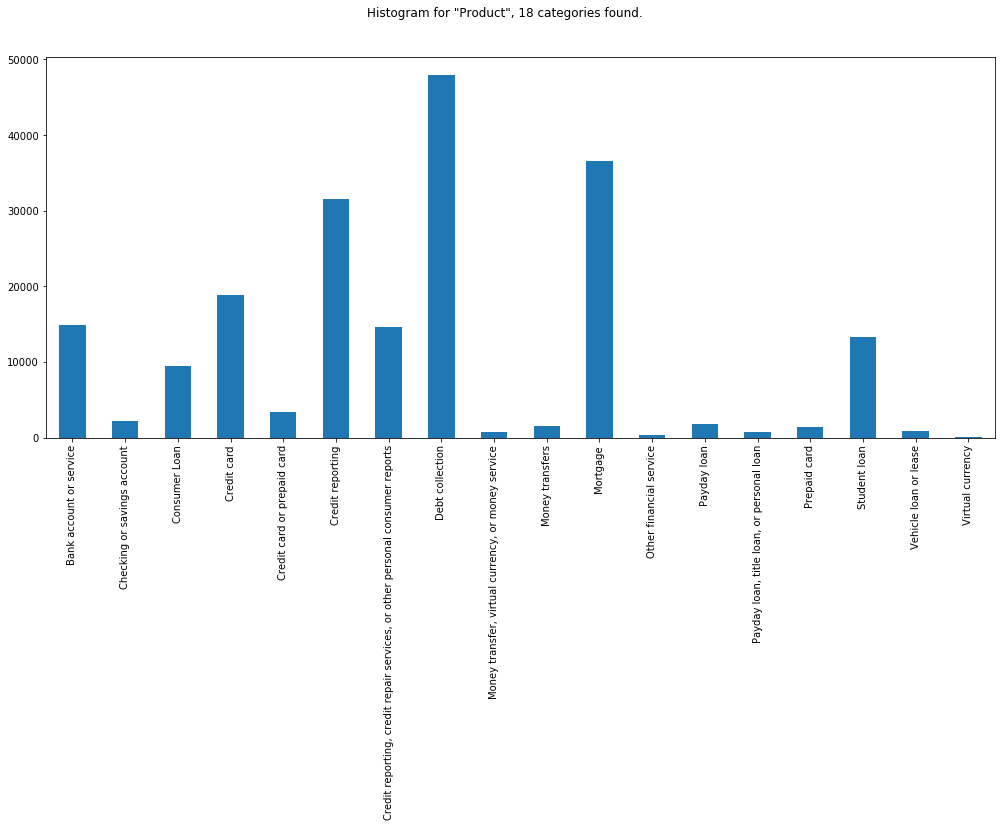

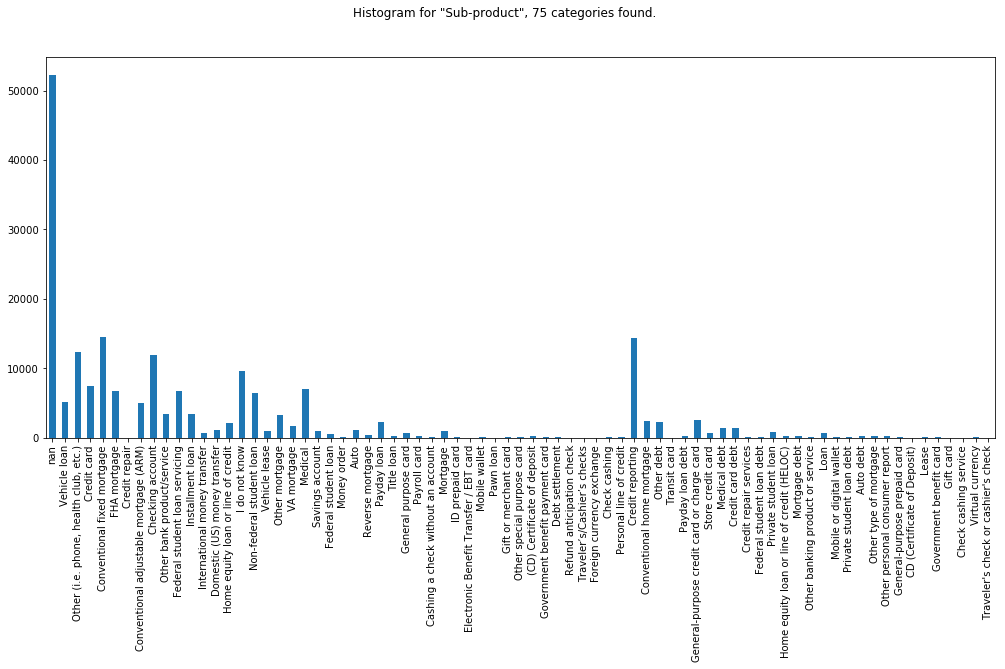

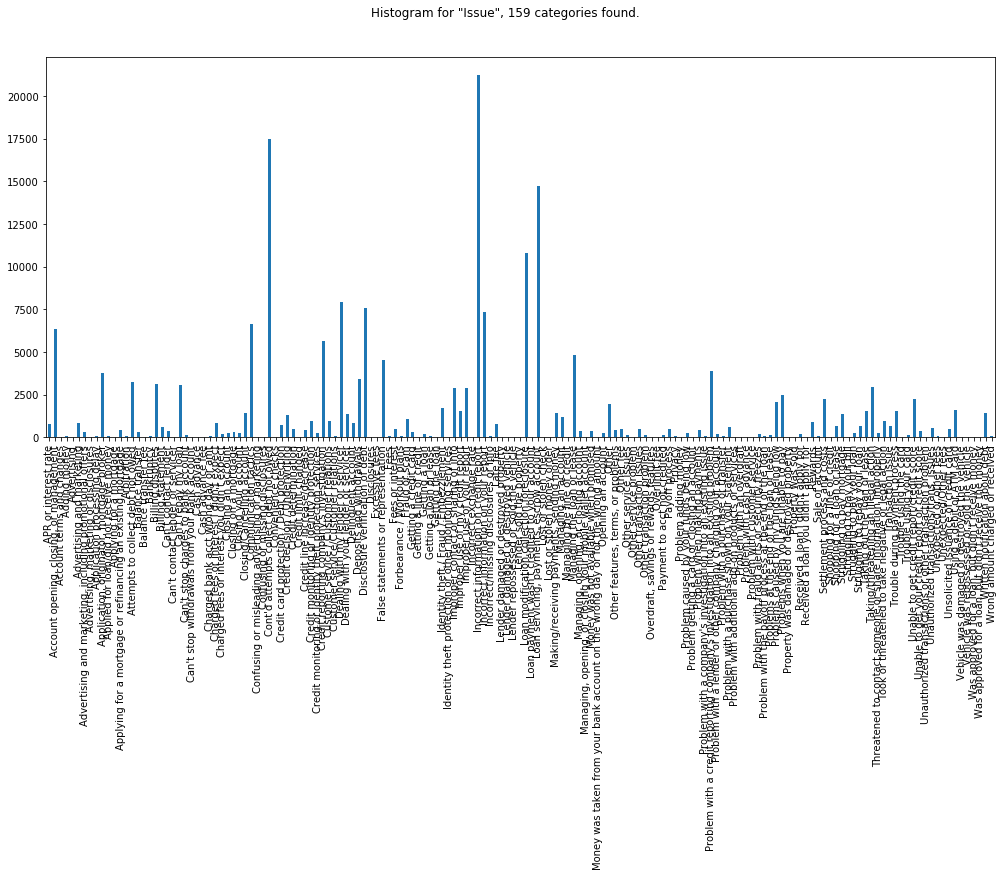

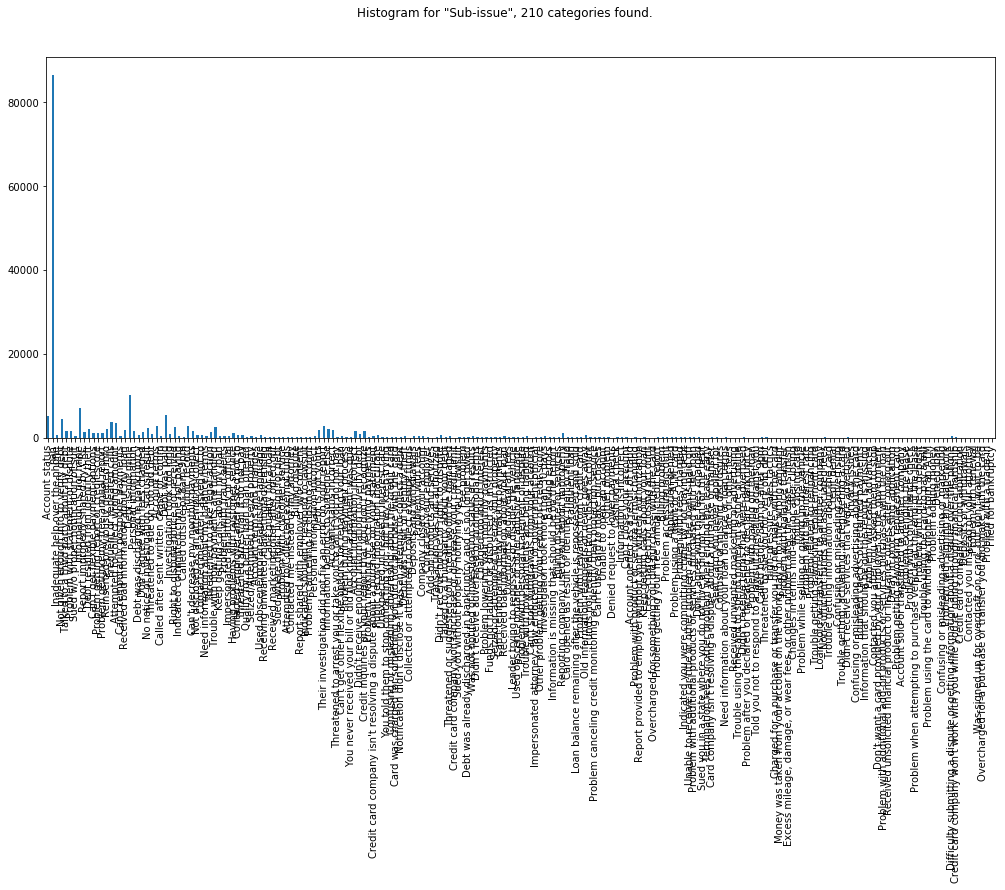

In [6]:
# DATA EXPLORATION FOR RELEVANT CATEGORIES
from collections import Counter, OrderedDict # CALLS COUNTER FUNCTION
from matplotlib import pyplot
categories = ['Product','Sub-product','Issue','Sub-issue']
k = 1
for i in categories:
    string_counts = Counter(df['{0}'.format(i)]) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
    #string_counts = OrderedDict(string_counts.most_common())
    pyplot.figure(k, figsize=(17, 7)) # CREATES A FIGURE WITH THE DIMENSIONS INDICATED
    converted_series=pd.Series(Counter(string_counts)) # CREATES A SERIE FROM THE COUNTER CLASS
    converted_series.plot(kind='bar') # PLOTS THE SERIES INTO BOX PLOT
    pyplot.suptitle('Histogram for "{0}", '.format(i)+str(len(string_counts))+" categories found.") # GIVES THE MAIN TITLE
    pyplot.show() # DISPLAYS THE FIGURE
    k += 1

In [ ]:
import nltk,re,pprint
def preprocess_complaint_narratives(df): # receives argument df. Is this dataframe?
    sentences = [] # CREATES AN EMPTY LIST FOR SENTECES. IS THIS SUPPOSED TO BE EMPTY?
    for doc in df: # FOR EVERY ANNOTATION IN THE CONSUMER COMPLAINT FIELD
        #Sentence tokenize
        sent = nltk.___________(doc) # GIVE SOMETHING TO MAKE THE TOKENS IN THE SENTENCES
        #word tokenize
        sent = [nltk.______(sent) for s in sent] # TURNS SENTENCES INTO WORDS
        #Part of speech tagging
        sent = [nltk.______(sent) for s in sent] # NOT SURE ABOUT THIS SECTION
        for s in sent: # RUNS LOOP FOR ALL ITEMS IN SENT
        sentences.append(s) # APPENDS ALL THE ITEMS INTO SENTENCES

return sentences

In [ ]:
compNarr = df['Consumer complaint narrative'] # Consumer narrative 
banks = set(df['Company']) # CREATES A __SET__  OF THE COMPANIES NAMES

tokens = preprocess_complaint_narratives(df) # compNarr
tree = [nltk.chunk.ne_chunk(t) for t in tokens]

In [ ]:
def extract_entity_names(t): # EXTRACTS THE ENTITIES NAMES
    entity_names = [] # CREATES AN EMPTY LIST TO PUT THE NAMES. OR IS IT SUPPOSSED TO BE SOMETHING ELSE?
    if hasattr(t, 'label') and t.label():
        # hasattr: The arguments are an object and a string. The result is True if the string is the name of one of the object’s attributes, False if not.
        if t.label() == '_________': # MAYBE LABEL IS SOMETHING LIKE ORGANIZATION OR ENTITY
            entity_names.append(' '.join([child[0] for child in t])) # something missing
        else:
            for child in t: # what is child?
                entity_names.extend(extract_entity_names(child))
    return entity_names

In [ ]:
# ENTITY NAME EXTRACTOR FROM COMPLAINS
entity_names = [] # list as container

for t in tree: # LOOP THROUGH THE ITEMS OF THE TREE
    entity_names.extend(extract_entity_names(t)) # "APPENDS" t (ENTITY) TO THE LIST

In [ ]:
counts = {}
for i in entity_names:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
sort_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True) # reverse order
plt.bar(range(len(counts)), _________, align='center') # find the upper value to graph
plt.xticks(range(len(counts)), ________) # find the upper value to graph
plt.show() # displays the graph

In [28]:
# # df['Consumer complaint narrative'][4]
# from nltk import word_tokenize, pos_tag, ne_chunk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# sentence = df['Consumer complaint narrative'][4]
# print(sentence)
# algo = ne_chunk(pos_tag(word_tokenize(sentence)))
# print(algo)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/k/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/k/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/k/nltk_data...
[nltk_data]   Package words is already up-to-date!
This complaint is in regards to Square Two Financial. Refer to CFPB case number XXXX regarding CACH, L. L. C. Square Two Financial has utilized my entire social security number to include date of birth on the pfd document listed with this complaint. The initial complaint was with CACH, L. L. C. and not Square Two Financial. This is in breach of the following : 1. Identity Theft Assumption and Deterrence Act of XXXX 2. Privacy Act of XXXX XXXX. Social Security XXXX 4. XXXX Privacy Act-which carries a maximum XXXX fine for each calendar cap